In [1]:
import os
import pandas as pd

# 폴더 경로
folder_path = "../data/processed/auction_weather"

# 폴더 내의 CSV 파일 가져오기
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# CSV 파일 읽고 합치기
dataframes = []
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

# 하나의 DataFrame으로 합치기
combined_df = pd.concat(dataframes, ignore_index=True)

In [2]:
print(combined_df.info())  
print(combined_df.head())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5641136 entries, 0 to 5641135
Data columns (total 25 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   date                   object 
 1   year                   int64  
 2   month                  int64  
 3   day                    int64  
 4   season                 object 
 5   region                 object 
 6   wholesale_market       object 
 7   category               object 
 8   item                   object 
 9   quantity_kg            float64
 10  price_won              float64
 11  unit_price_per_kg      float64
 12  avg_quantity_kg        float64
 13  avg_price_won          float64
 14  avg_unit_price_per_kg  float64
 15  avg_temp               float64
 16  min_temp               float64
 17  max_temp               float64
 18  daily_rainfall         float64
 19  max_wind               float64
 20  avg_wind               float64
 21  avg_humidity           float64
 22  avg_pressure      

In [3]:
# 품목별 거래량 합계를 기준으로 상위 30개 품목 선정
top_items = combined_df.groupby('item')['quantity_kg'].sum().nlargest(30).index

# 상위 30개 품목만 포함
filtered_df = combined_df[combined_df['item'].isin(top_items)]

print(f"선택된 상위 30개 품목: {top_items.tolist()}")

선택된 상위 30개 품목: ['양파', '무', '배추', '사과', '오이', '수박', '감자', '대파', '감귤', '양배추', '호박', '바나나', '고구마', '토마토', '당근', '포도', '얼갈이배추', '배', '풋고추', '복숭아', '참외', '딸기', '상추', '방울토마토', '열무', '새송이', '부추', '단감', '시금치', '마늘']
<class 'pandas.core.frame.DataFrame'>
Index: 1529912 entries, 0 to 5641135
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   date                   1529912 non-null  object 
 1   year                   1529912 non-null  int64  
 2   month                  1529912 non-null  int64  
 3   day                    1529912 non-null  int64  
 4   season                 1529912 non-null  object 
 5   region                 1529912 non-null  object 
 6   wholesale_market       1529912 non-null  object 
 7   category               1529912 non-null  object 
 8   item                   1529912 non-null  object 
 9   quantity_kg            1529912 non-null  float64
 10  price_won              1529912 

In [5]:
from scipy.stats import pearsonr

### 가설 설정
1. 귀무가설 (𝐻0):
기후 조건(예: 평균 기온)은 특정 품목의 거래량에 영향을 미치지 않는다.
즉, 상관계수(𝑟)가 0이다.
2. 대립가설 (𝐻𝑎):
기후 조건(예: 평균 기온)은 특정 품목의 거래량에 영향을 미친다.
즉, 상관계수(𝑟)가 0이 아니다.

In [6]:
# 품목별 평균 기온(avg_temp)과 거래량(quantity_kg) 상관분석
results = {}
for item in filtered_df['item'].unique():
    item_data = filtered_df[filtered_df['item'] == item]
    if len(item_data) > 1:  # 데이터 샘플이 2개 이상일 경우에만 상관분석
        corr, p_value = pearsonr(item_data['avg_temp'], item_data['quantity_kg'])
        results[item] = (corr, p_value)
    else:
        results[item] = (None, None)  # 데이터가 부족한 경우 None 처리

# 결과 출력
for item, (corr, p_value) in results.items():
    if corr is not None:
        print(f"품목: {item}, 상관계수: {corr:.2f}, P-value: {p_value:.4f}")
    else:
        print(f"품목: {item}, 데이터가 부족하여 상관분석을 수행할 수 없습니다.")

품목: 감귤, 상관계수: -0.34, P-value: 0.0000
품목: 바나나, 상관계수: 0.01, P-value: 0.0014
품목: 배, 상관계수: -0.02, P-value: 0.0001
품목: 복숭아, 상관계수: 0.25, P-value: 0.0000
품목: 사과, 상관계수: -0.05, P-value: 0.0000
품목: 포도, 상관계수: 0.19, P-value: 0.0000
품목: 방울토마토, 상관계수: 0.08, P-value: 0.0000
품목: 토마토, 상관계수: 0.10, P-value: 0.0000
품목: 오이, 상관계수: 0.11, P-value: 0.0000
품목: 호박, 상관계수: 0.05, P-value: 0.0000
품목: 당근, 상관계수: -0.01, P-value: 0.0040
품목: 무, 상관계수: -0.03, P-value: 0.0000
품목: 새송이, 상관계수: 0.01, P-value: 0.0644
품목: 감자, 상관계수: 0.05, P-value: 0.0000
품목: 고구마, 상관계수: -0.04, P-value: 0.0000
품목: 배추, 상관계수: -0.00, P-value: 0.4407
품목: 부추, 상관계수: 0.02, P-value: 0.0000
품목: 상추, 상관계수: 0.01, P-value: 0.0960
품목: 시금치, 상관계수: -0.18, P-value: 0.0000
품목: 양배추, 상관계수: -0.01, P-value: 0.0531
품목: 얼갈이배추, 상관계수: 0.04, P-value: 0.0000
품목: 열무, 상관계수: 0.14, P-value: 0.0000
품목: 대파, 상관계수: -0.03, P-value: 0.0000
품목: 마늘, 상관계수: 0.01, P-value: 0.0276
품목: 양파, 상관계수: 0.02, P-value: 0.0000
품목: 풋고추, 상관계수: 0.05, P-value: 0.0000
품목: 수박, 상관계수: 0.32, P-value: 0.0000
품목: 참외

- 유의미한 상관관계를 가진 품목  
p-value < 0.05  
결론: 기온이 이 품목들의 거래량에 유의미한 영향을 미친다.  
감귤, 바나나, 배, 복숭아, 사과, 포도, 방울토마토, 토마토, 오이, 호박, 당근, 무, 감자, 고구마, 부추, 얼갈이배추, 열무, 대파, 마늘, 양파, 풋고추, 수박, 참외, 단감, 딸기   

- 상관관계가 없는 품목  
p-value ≥ 0.05  
결론: 기온이 이 품목들의 거래량에 유의미한 영향을 미치지 않는다  
새송이, 배추, 상추, 양배추

In [10]:

# 전체 데이터의 기온(avg_temp)과 거래량(quantity_kg) 상관분석
corr, p_value = pearsonr(filtered_df['avg_temp'], filtered_df['quantity_kg'])

# 결과 출력
print(f"전체 데이터 상관계수: {corr:.2f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("전체적으로 기온과 거래량 간 상관관계가 통계적으로 유의미합니다.")
else:
    print("전체적으로 기온과 거래량 간 상관관계가 통계적으로 유의하지 않습니다.")


전체 데이터 상관계수: 0.01, P-value: 0.0000
전체적으로 기온과 거래량 간 상관관계가 통계적으로 유의미합니다.


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_8024\1001177798.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['temp_bin'] = pd.cut(filtered_df['avg_temp'], bins)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_8024\1001177798.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_bin_analysis = filtered_df.groupby('temp_bin')['quantity_kg'].mean().reset_index()


         temp_bin   quantity_kg
0  (-15.9, -10.9]  21733.681541
1   (-10.9, -5.9]  17896.539535
2    (-5.9, -0.9]  18305.614190
3     (-0.9, 4.1]  17260.239473
4      (4.1, 9.1]  16051.838218
5     (9.1, 14.1]  17391.373596
6    (14.1, 19.1]  17736.384758
7    (19.1, 24.1]  19292.656953
8    (24.1, 29.1]  19290.660615


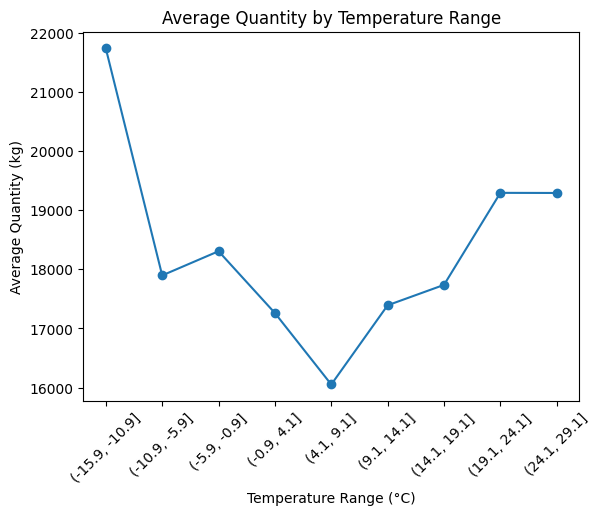

In [11]:
import numpy as np

# 기온 구간 나누기
bins = np.arange(filtered_df['avg_temp'].min(), filtered_df['avg_temp'].max(), 5)
filtered_df['temp_bin'] = pd.cut(filtered_df['avg_temp'], bins)

# 각 기온 구간별 평균 거래량 계산
temp_bin_analysis = filtered_df.groupby('temp_bin')['quantity_kg'].mean().reset_index()

# 결과 출력
print(temp_bin_analysis)

# 시각화
import matplotlib.pyplot as plt

plt.plot(temp_bin_analysis['temp_bin'].astype(str), temp_bin_analysis['quantity_kg'], marker='o')
plt.xlabel('Temperature Range (°C)')
plt.ylabel('Average Quantity (kg)')
plt.title('Average Quantity by Temperature Range')
plt.xticks(rotation=45)
plt.show()


avg_temp          0.014972
daily_rainfall   -0.001927
avg_humidity     -0.026469
avg_pressure     -0.044391
quantity_kg       1.000000
Name: quantity_kg, dtype: float64


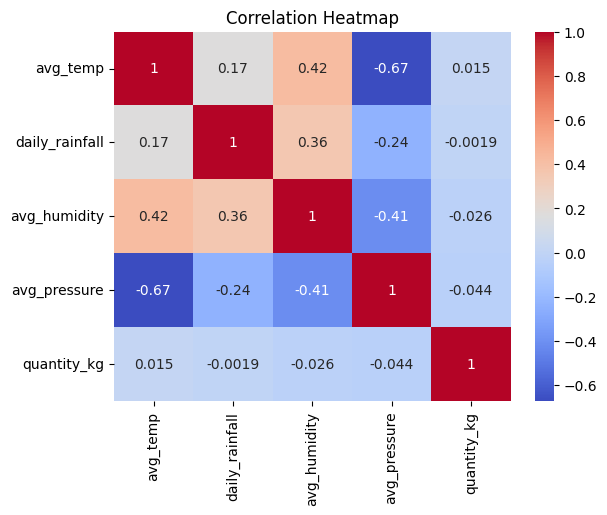

In [12]:
# 주요 변수 선택
features = ['avg_temp', 'daily_rainfall', 'avg_humidity', 'avg_pressure']
correlations = filtered_df[features + ['quantity_kg']].corr()

# 상관분석 결과 출력
print(correlations['quantity_kg'])

# 히트맵 시각화
import seaborn as sns

sns.heatmap(correlations, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
